#### **2024 Malaysia's Household Income and Expenditure: Administrative Districts**

**Project Overview**

**Objective :** \
Analyze household income and expense trends in Malaysia across various dimensions like date, state, district, income mean and median, expenditure mean and median, gini (income inequality) and poverty.

**Dataset Source :** \
*data.gov.my*

**Goal :** \
Provide actionable insights into income and expense distribution, identifying factors influencing gini ratio and poverty rates by each states and districts

##### Import Libraries

In [2]:
# Essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization style libraries
# plt.style.use('dark_background')
plt.style.use('default')
import matplotlib
custom = {
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'figure.figsize': (10,8),
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'axes.facecolor': '#aaaaaa',
    'figure.facecolor': '#bbbbbb',
    'grid.color': '#000000',
    'grid.linewidth': 0.7,
    'legend.edgecolor': '#000000',
}
matplotlib.rcParams.update(custom)
import plotly.express as px

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

##### Data Collection

Loading Dataset

The dataset is stored in a parquet file. \
It contains crucial details like date, state, income, and expediture values.

In [3]:
# Household Income and Expenditure: Administrative Districts

URL_DATA = 'https://storage.dosm.gov.my/hies/hies_district.parquet'

df = pd.read_parquet(URL_DATA)

In [4]:
# df.to_excel(r'D:\Folders-VS Code\VS Code Folders\11-Portfolio Project\01-project_csvfiles\x-04-household_income_expense_malaysia.xlsx', index=False)

##### Data Preprocessing

- Remove null or duplicate values
- Convert data types
- Assign/Create new column based on suitable preference

In [4]:
"""
Data Inspection
"""
# Summary
print(f'Summary Statistics: \n{df.describe()}\n')

# Dataset Shape
print(f'Total Rows: {df.shape[0]} \nTotal Columns: {df.shape[1]}\n')

# Missing Value
print(f'Missing Data per Column: \n{df.isnull().sum()}\n')

# Duplicate Value
print(f'Duplicate Data per Column: \n{df.duplicated().sum()}\n')

# Head
print(f'Head: \n{df.head()}\n')

# Info
print(f'Info: \n{df.info()}\n')

Summary Statistics: 
        income_mean  income_median  expenditure_mean        gini     poverty
count    160.000000     160.000000        160.000000  160.000000  160.000000
mean    5973.337500    4779.937500       3822.812500    0.343717   12.106875
std     2115.765431    1771.312943       1154.553153    0.039462   10.033830
min     3153.000000    2329.000000       2019.000000    0.225170    0.000000
25%     4633.000000    3682.000000       3042.750000    0.316945    4.975000
50%     5324.500000    4199.500000       3564.500000    0.346585    9.050000
75%     6712.000000    5371.750000       4383.750000    0.369217   16.525000
max    13673.000000   12608.000000       8897.000000    0.448690   52.700000

Total Rows: 160 
Total Columns: 8

Missing Data per Column: 
date                0
state               0
district            0
income_mean         0
income_median       0
expenditure_mean    0
gini                0
poverty             0
dtype: int64

Duplicate Data per Column: 
0

Hea

In [22]:
"""
Convert Data Types
"""
# Convert data type to its relevant type
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')
df[['gini','poverty']] = round(df[['gini','poverty']],2)

In [6]:
"""
Assign new column
"""
df['savings_mean'] = df['income_mean'] - df['expenditure_mean']

In [23]:
df.to_excel(r'D:\Folders-VS Code\VS Code Folders\11-Portfolio Project\01-project_csvfiles\x-04-household_income_expense_malaysia.xlsx',index=False)

##### Exploratory Data Analysis



In [7]:
# Overview dataset head
df [:2]

,date,state,district,income_mean,income_median,expenditure_mean,gini,poverty,savings_mean
0,2022-01-01,Johor,Batu Pahat,7419,6347,4570,0.34,5.1,2849
1,2022-01-01,Johor,Johor Bahru,9869,8232,6139,0.36,3.7,3730


Average Income and Expense Distribution : \
Identify income and expense distribution by State and District

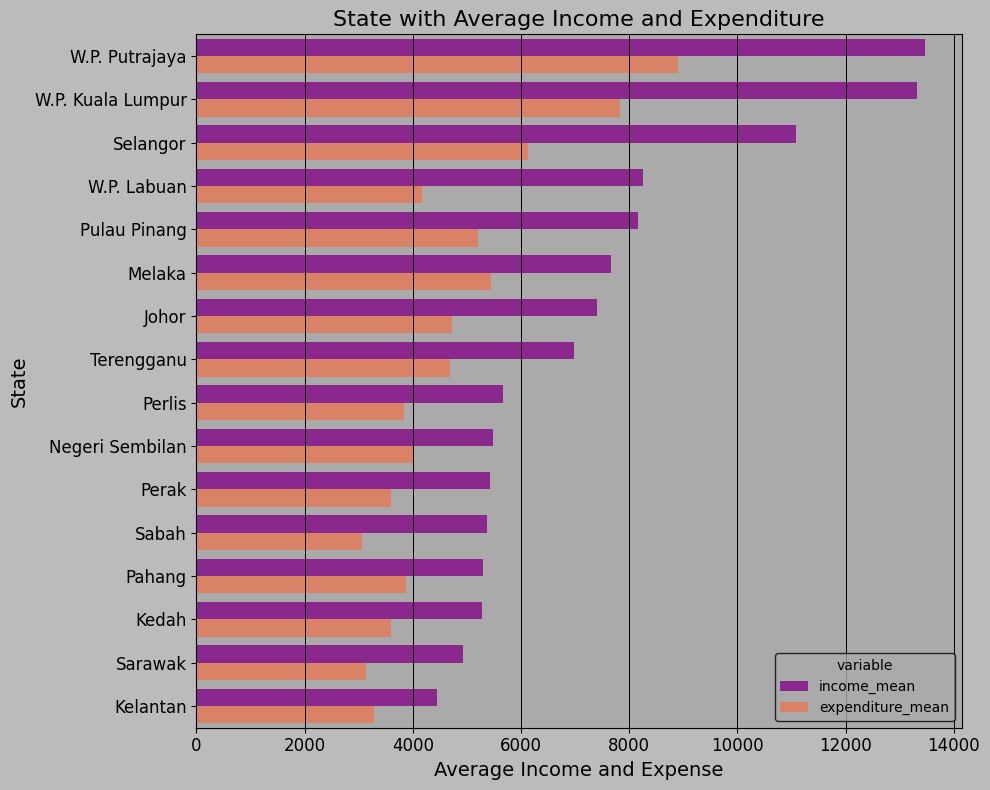

In [10]:
# Average Income and Expenditure by State

sns.barplot(df.groupby('state')[['income_mean','expenditure_mean']].mean()\
            .sort_values(by=['income_mean','expenditure_mean'],ascending=False)\
              .reset_index().melt(id_vars='state'),
              orient='h', x='value', y='state',
              hue='variable', palette='plasma')
plt.title('State with Average Income and Expenditure')
plt.xlabel('Average Income and Expense')
plt.ylabel('State')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

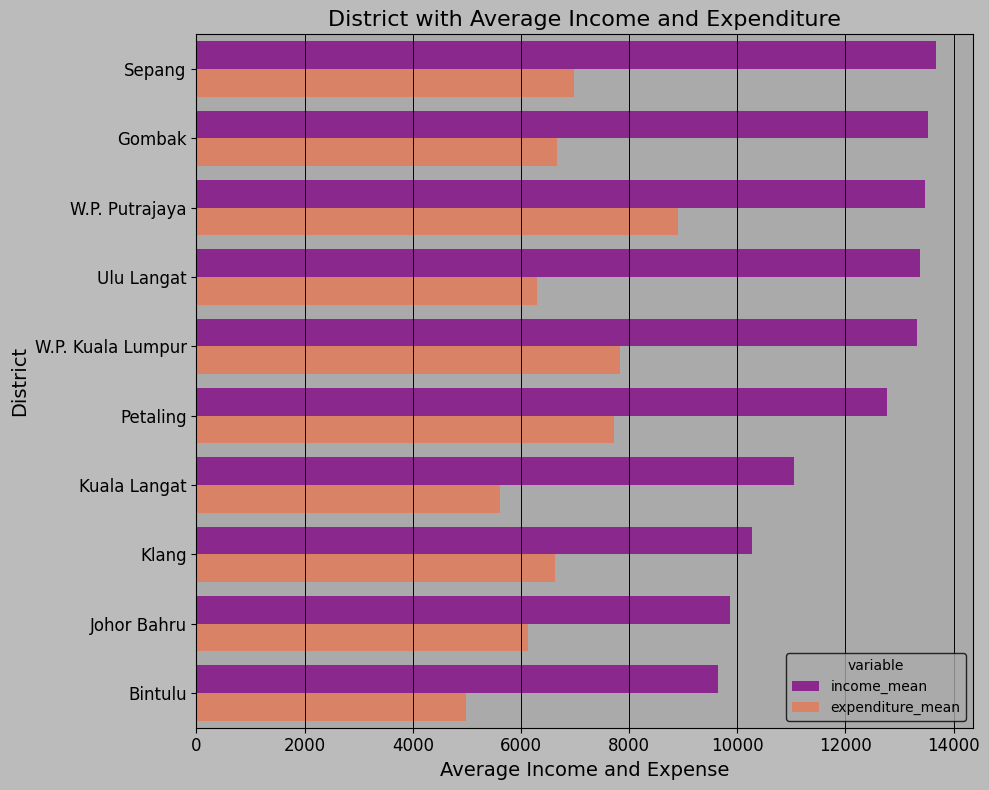

In [9]:
# Average Income and Expenditure by District

sns.barplot(df.groupby('district')[['income_mean','expenditure_mean']].mean()\
            .sort_values(by=['income_mean','expenditure_mean'],ascending=False) [:10]\
              .reset_index().melt(id_vars='district'),
              orient='h', x='value', y='district',
              hue='variable', palette='plasma')
plt.title('District with Average Income and Expenditure')
plt.xlabel('Average Income and Expense')
plt.ylabel('District')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

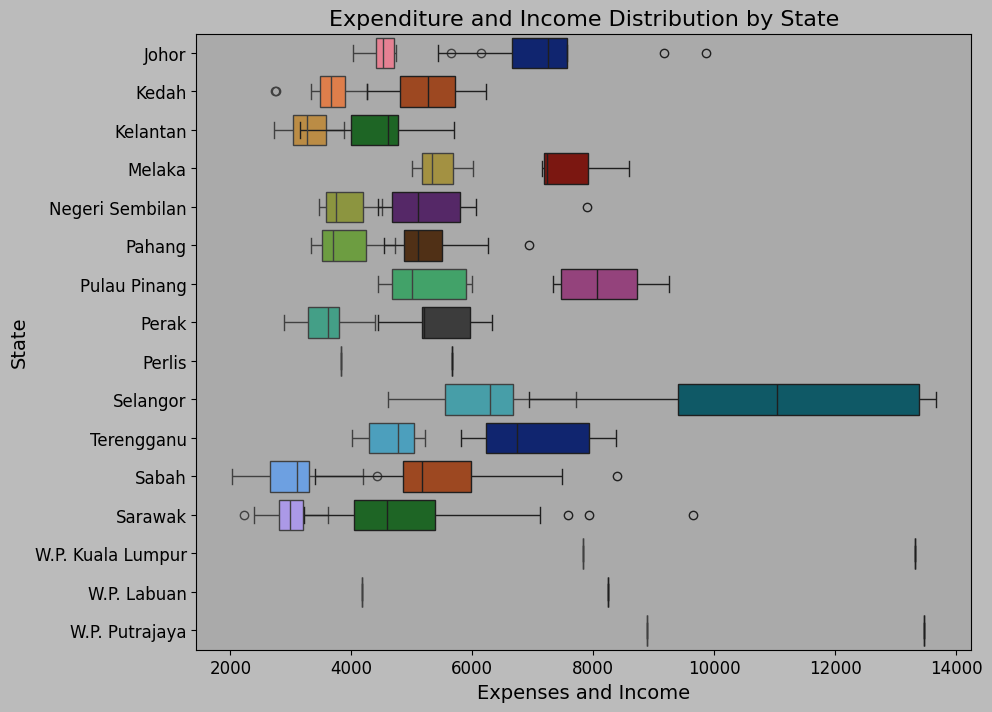

In [9]:
# Average Income and Expenses Distribution by States

sns.boxplot(x='expenditure_mean', y='state', data=df, palette='husl')
sns.boxplot(x='income_mean', y='state', data=df, palette='dark')
plt.title('Expenditure and Income Distribution by State')
plt.xlabel('Expenses and Income')
plt.ylabel('State')
plt.show()

Average Savings Distribution : \
Identify Savings distribution by State and District

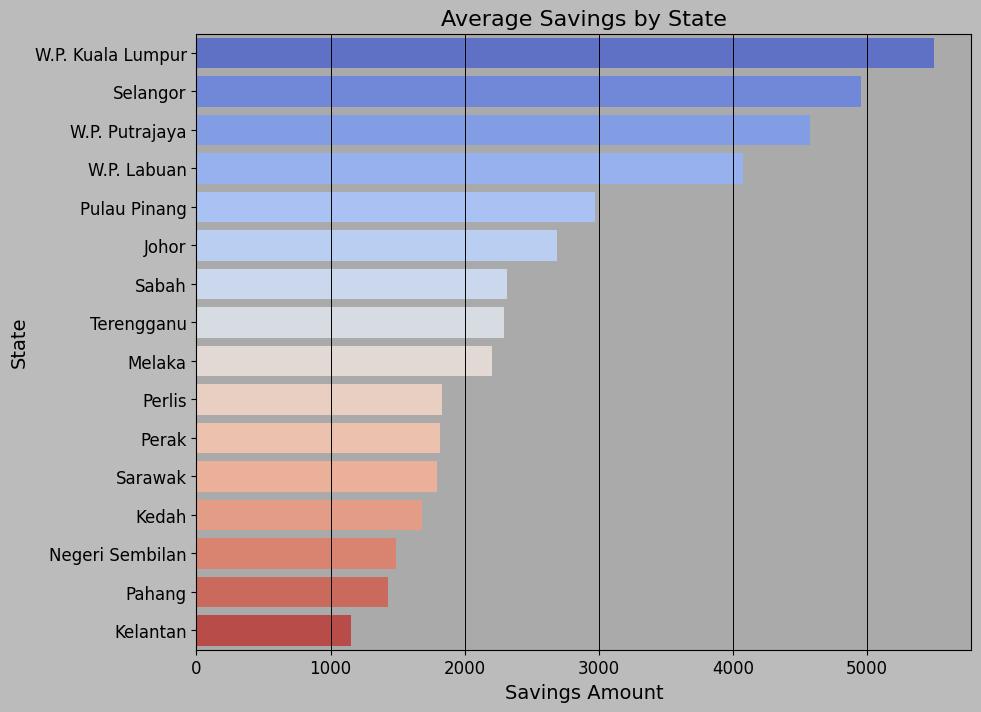

In [10]:
# Savings distribution by State

sns.barplot(df.groupby('state')['savings_mean'].mean()\
            .sort_values(ascending=False),
            orient='h', palette='coolwarm')
plt.title('Average Savings by State')
plt.xlabel('Savings Amount')
plt.ylabel('State')
plt.grid(axis='x')
plt.show()

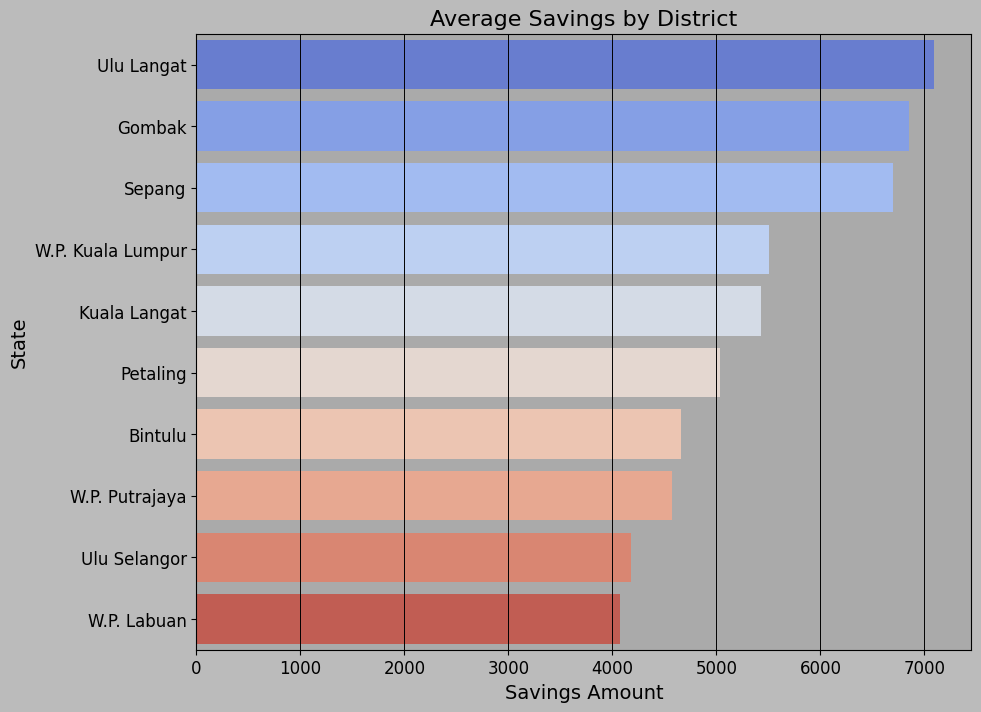

In [11]:
# Saving distribution by District

sns.barplot(df.groupby('district')['savings_mean'].mean()\
            .sort_values(ascending=False)[:10],
            orient='h', palette='coolwarm')
plt.title('Average Savings by District')
plt.xlabel('Savings Amount')
plt.ylabel('State')
plt.grid(axis='x')
plt.show()

Poverty Rate : \
Identify poverty rate by each state

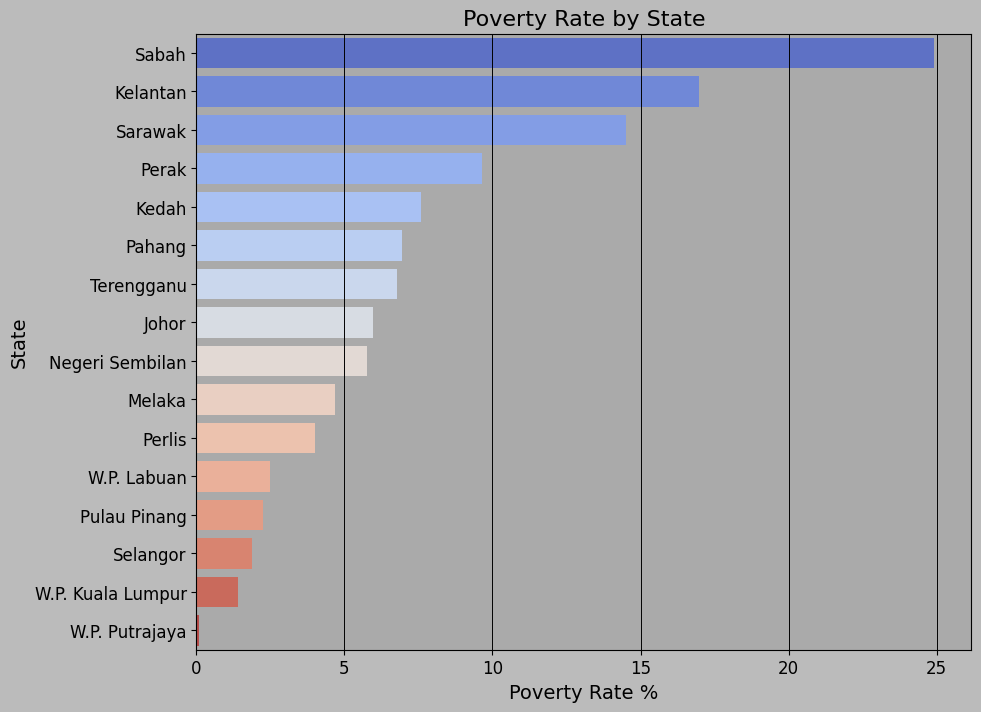

In [12]:
# Rate of poverty in each state

sns.barplot(df.groupby('state')['poverty'].mean().sort_values(ascending=False),
            orient='h', palette='coolwarm')
plt.title('Poverty Rate by State')
plt.xlabel('Poverty Rate %')
plt.ylabel('State')
plt.grid(axis='x')
plt.show()

Gini Distribution : \
Identify Gini distribution by each state

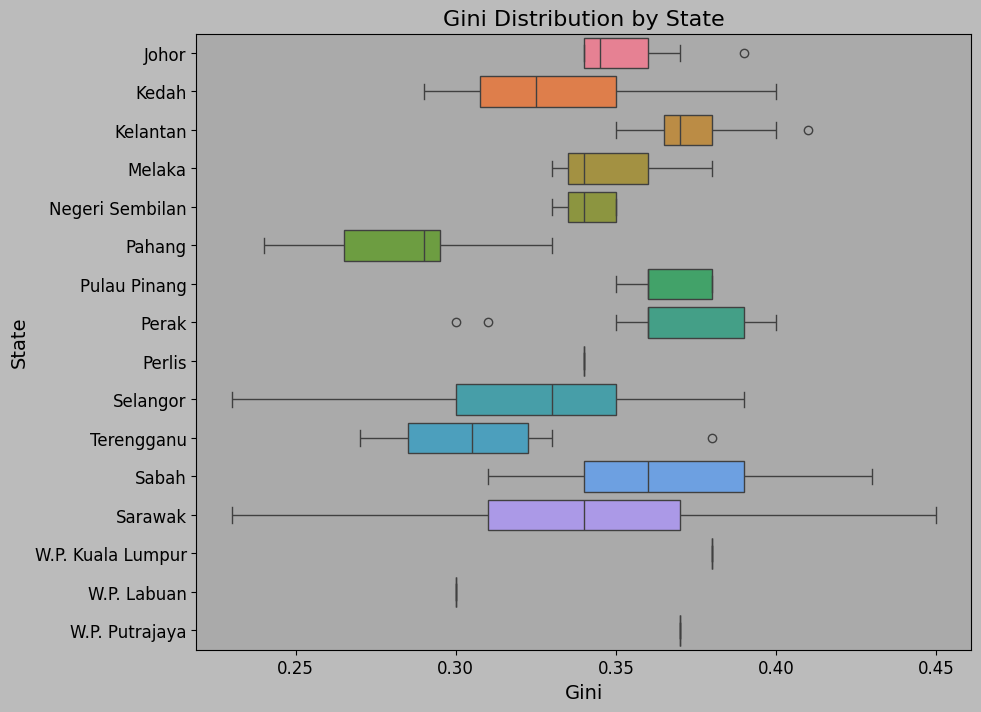

In [13]:
# Gini by each State

sns.boxplot(x='gini', y='state', data=df, palette='husl')
plt.title('Gini Distribution by State')
plt.xlabel('Gini')
plt.ylabel('State')
plt.show()

Correlation Analysis : \
Identify correlations for numeric features and all features to understand their relationships.

In [14]:
df_copy = df
df_copy = df_copy.apply(lambda col: col.astype('category').cat.codes if col.dtypes=='object' else col)

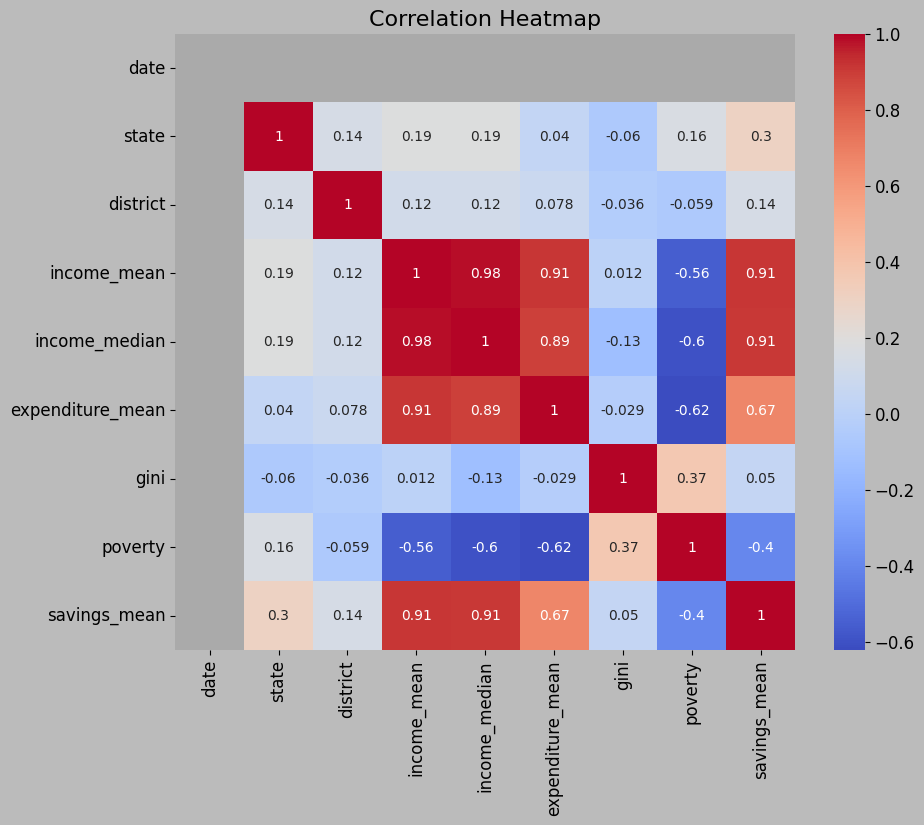

In [15]:
# Correlation for all feautures

sns.heatmap(df_copy.corr(),
            annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##### Advanced Analysis



In [23]:
# Import necessary library
from sklearn.cluster import KMeans

K-Means Clustering 

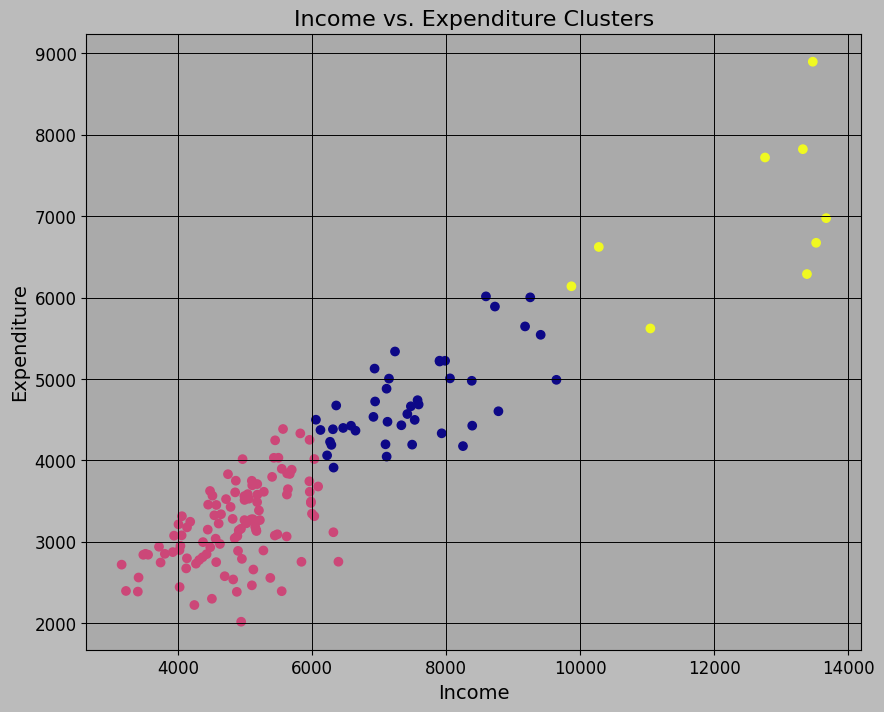

In [17]:
# Define features
features = df[['income_mean', 'expenditure_mean']].dropna()

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=0)
features['cluster'] = kmeans.fit_predict(features)

# Plotting
plt.scatter(features['income_mean'], features['expenditure_mean'],
            c=features['cluster'], cmap='plasma')
plt.title('Income vs. Expenditure Clusters')
plt.xlabel('Income')
plt.ylabel('Expenditure')
plt.grid()
plt.show()

In [18]:
for i,j in enumerate(features['cluster'].value_counts()):
  total = features['cluster'].count()
  percent = (j/total)*100
  print(f'Cluster {i} - {percent}%')

Cluster 0 - 68.125%
Cluster 1 - 26.25%
Cluster 2 - 5.625%


##### Summary/Conclusion



Income and Expenditure Distribution :
- Urban states and districts are tend to have higher income and expenditure.

Saving Preferences : 
- Suburban district have higher savings.

Poverty Rates :
- Remote states like *Sabah*, *Kelantan* and *Sarawak* have higher poverty rates. This might happen due to many rural or under development area.

Gini Distribution :
- *Sarawak*, *Selangor*, *Pahang* and *Terengganu* have equality of income which everyone have the same income.
- *Sarawak* also have income inequality which everyone does not have same income.

K-Means Clustering Distribution :
- 5.625% district with high income
- 26.25% district with moderate income
- 68.125% district with low income